In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
train_df=pd.read_csv("C:/Users/prith/OneDrive/Desktop/Spring 2021/ML/proj/check point/archive/heart.csv")

In [ ]:
train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
train_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
train_df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [ ]:
train_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
out_l = 0
std_o = 3
for i, j in enumerate(train_df.columns):
    if train_df.std()[i] > 0:
        score = (i - train_df.mean()[i]) / train_df.std()[i]  
        if np.abs(score) > std_o:
            out_l = out_l + 1
print(out_l)

12


In [ ]:
repl_nan = train_df.mask(train_df.sub(train_df.mean()).div(train_df.std()).abs().gt(3))

In [ ]:
repl_nan

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0.0,3.0,0
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0.0,3.0,0
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1.0,3.0,0
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221.0,0,1,164.0,1,0.0,2,0.0,2.0,1
1021,60,1,0,125.0,258.0,0,0,141.0,1,2.8,1,1.0,3.0,0
1022,47,1,0,110.0,275.0,0,0,118.0,1,1.0,1,1.0,2.0,0
1023,50,0,0,110.0,254.0,0,0,159.0,0,0.0,2,0.0,2.0,1


In [ ]:
repl_nan.isnull().sum().sum() 

56

In [ ]:
repl_med = repl_nan.fillna(repl_nan.median())

In [ ]:
repl_med.isnull().sum().sum()

0

In [ ]:
train_df[['fbs', 'target']].groupby(['fbs']).mean()

,target
fbs,
0,0.521789
1,0.464052


In [ ]:
train_df.slope.value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

In [ ]:
train_df.thal.value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [ ]:
train_df.ca.value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

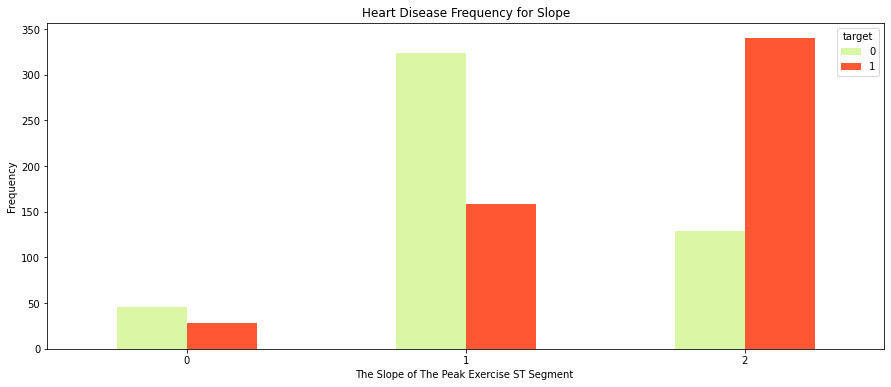

In [ ]:
pd.crosstab(train_df.slope,train_df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
pt.title('Heart Disease Frequency for Slope')
pt.xlabel('The Slope of The Peak Exercise ST Segment ')
pt.ylabel('Frequency')
pt.xticks(rotation = 0)
pt.show()

In [ ]:
train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
categorical=train_df[["slope","ca","thal"]]

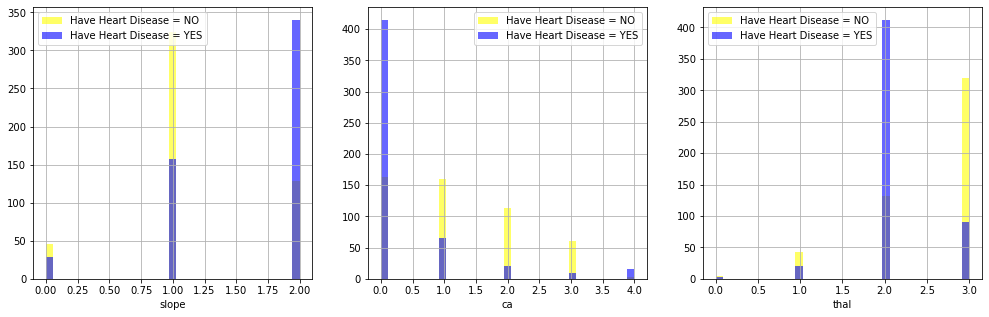

In [ ]:
pt.figure(figsize=(17, 17))
for i, column in enumerate(categorical, 1):
    plt.subplot(3, 3, i)
    train_df[train_df["target"] == 0][column].hist(bins=35, color='yellow', label='Have Heart Disease = NO', alpha=0.6)
    train_df[train_df["target"] == 1][column].hist(bins=35, color='blue', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)